Data preprocessing


In [119]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# --------------------
# Step 1: Load the dataset with proper encoding and error handling.
# --------------------
df = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    encoding="ISO-8859-1",  # Fix for UnicodeDecodeError
    header=None,
    quoting=3,
    on_bad_lines='skip'
)

#Rabdom sampling
df=df.sample(n=500,random_state=1)
# --------------------
# Step 2: Clean and filter the target column (column 0).
# --------------------
# The target values are stored with extra quotes (e.g. '"0"', '"4"')
# Remove the double quotes.
df[0] = df[0].str.replace('"', '', regex=False)

# Convert the target values from strings to numeric.
df[0] = pd.to_numeric(df[0], errors='coerce')

# Filter to keep only rows where the target (column 0) is either 0 or 4.
df = df[df[0].isin([0, 4])].copy()

# --------------------
# Step 3: Clean the text data (column 5).
# --------------------
# Convert text to lowercase.
df[5] = df[5].str.lower()

# Remove URLs and Twitter mentions.
df[5] = df[5].str.replace(r"http\S+|www\S+|@\S+", "", regex=True)

# Replace any non-letter characters with a space (this helps to preserve word boundaries).
df[5] = df[5].str.replace(r"[^a-zA-Z\s]", " ", regex=True)

# Collapse multiple spaces into one.
df[5] = df[5].str.replace(r"\s+", " ", regex=True)

# Remove leading and trailing whitespace.
df[5] = df[5].str.strip()

# Remove any rows where the text becomes empty after cleaning.
df = df[df[5] != ""]

# Optional: Check a few cleaned text samples.
print("Sample cleaned text:")
print(df[5].head())

# --------------------
# Step 4: Vectorize the text using TF-IDF.
# --------------------
# Use a token pattern that includes single-character tokens if needed.
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
X_tfidf = vectorizer.fit_transform(df[5])

# --------------------
# Step 5: Convert to NumPy arrays.
# --------------------
# The TF-IDF data as a NumPy array:
X = X_tfidf.toarray()
# The target labels from column 0:
y = df[0].values

# --------------------
# Step 6: Split into training and testing sets.
# --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1,stratify=y
)
print("Unique classes in y_train after stratified split:", np.unique(y_train))

# Confirm the shapes of the split arrays.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Sample cleaned text:
1030005    gearing up for nyc this weekend profile php id...
935110     laying out by the pool for the straight day i ...
859710                                welcome to am wake ups
268457               i hav a cold it comes with the sneezles
817772                                  happy birthday to me
Name: 5, dtype: object
Unique classes in y_train after stratified split: [0 4]
X_train shape: (399, 1819)
X_test shape: (100, 1819)
y_train shape: (399,)
y_test shape: (100,)


In [120]:
df.head()

,0,1,2,3,4,5,6
1030005,4,"""1993373845""","""Mon Jun 01 10:16:23 PDT 2009""","""NO_QUERY""","""Firepit_Friday""",gearing up for nyc this weekend profile php id...,NaN
935110,4,"""1972634588""","""Sat May 30 09:35:43 PDT 2009""","""NO_QUERY""","""skyangl""",laying out by the pool for the straight day i ...,NaN
859710,4,"""1881452580""","""Fri May 22 04:42:21 PDT 2009""","""NO_QUERY""","""susanwu""",welcome to am wake ups,NaN
268457,0,"""2001685659""","""Tue Jun 02 01:43:17 PDT 2009""","""NO_QUERY""","""ShannonAdler""",i hav a cold it comes with the sneezles,NaN
817772,4,"""1825715883""","""Sun May 17 06:37:17 PDT 2009""","""NO_QUERY""","""JJSweetNothings""",happy birthday to me,NaN


In [128]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
print(y)

[4 4 4 0 4 0 4 4 0 4 4 0 4 4 0 4 0 0 0 0 4 0 4 0 4 4 4 4 0 0 4 0 4 0 0 0 4
 0 0 0 4 0 0 4 0 0 0 0 4 0 4 4 0 4 0 0 4 0 4 4 4 0 0 0 0 0 0 0 0 0 4 4 0 4
 0 4 4 0 4 4 4 0 0 4 0 4 4 0 4 0 4 0 4 4 0 0 4 0 4 4 4 4 0 0 4 4 4 0 0 4 0
 4 0 4 0 0 0 0 4 4 0 0 0 4 0 0 4 4 4 0 4 4 0 0 4 4 0 4 0 0 4 4 0 0 4 0 0 4
 0 4 4 4 4 0 4 4 0 0 0 4 4 0 0 4 4 4 4 4 4 0 4 0 4 4 0 4 0 0 0 4 0 4 4 4 4
 0 0 0 4 4 0 0 4 4 4 0 0 4 4 0 0 0 4 0 4 4 4 0 4 4 0 0 0 0 4 4 0 4 0 0 4 4
 4 0 0 0 0 4 0 4 0 4 0 4 0 4 4 4 4 4 0 4 4 4 4 4 4 0 0 4 0 0 0 0 0 0 4 0 4
 4 0 4 4 0 0 4 4 0 0 0 4 0 4 0 4 4 0 0 0 4 0 0 4 0 0 0 4 0 0 0 0 4 0 4 0 0
 0 4 0 0 4 0 0 0 0 4 4 0 4 4 0 0 4 0 4 4 0 0 0 0 4 0 0 0 4 0 4 0 0 0 4 4 4
 4 4 4 4 0 0 4 0 0 0 0 0 4 0 0 4 0 4 4 0 0 0 0 0 4 0 4 0 4 0 0 0 0 4 4 4 0
 4 4 4 4 0 4 4 4 0 4 4 0 4 0 0 0 4 0 4 0 4 4 0 4 4 0 4 0 4 4 4 0 0 0 0 0 4
 4 0 0 4 0 4 0 0 4 4 4 4 4 4 0 4 4 0 4 4 4 0 4 0 4 0 0 0 0 0 0 4 0 0 4 0 4
 4 4 0 4 4 0 0 0 4 4 0 4 0 0 0 4 0 4 4 4 0 0 4 0 4 4 4 0 0 4 0 0 4 0 0 4 4
 0 0 0 0 4 4 4 4 0 4 4 0 

In [69]:
print(X_train)
print(X_train.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.26191104 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(399, 1819)


In [70]:
print(X_test)
print(X_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.15525251 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.19874731 0.         0.         ... 0.         0.         0.        ]]
(100, 1819)


In [129]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5665 stored elements and shape (499, 1819)>
  Coords	Values
  (0, 609)	0.3029578486564518
  (0, 1638)	0.1875202216870241
  (0, 569)	0.13846074708645534
  (0, 1080)	0.2841217568045096
  (0, 1545)	0.17872888646198265
  (0, 1720)	0.21600230790156544
  (0, 1214)	0.6059156973129036
  (0, 1164)	0.3029578486564518
  (0, 755)	0.3029578486564518
  (0, 55)	0.2281905758569393
  (0, 1252)	0.3029578486564518
  (1, 569)	0.1667390657401651
  (1, 860)	0.34214892872459884
  (1, 1114)	0.21719443078700498
  (1, 222)	0.28727811314220486
  (1, 1532)	0.2634700379627961
  (1, 1188)	0.34214892872459884
  (1, 1452)	0.36483198095186814
  (1, 374)	0.20972424533254155
  (1, 752)	0.1055499919546625
  (1, 926)	0.20972424533254155
  (1, 393)	0.36483198095186814
  (1, 1567)	0.13173501898139806
  (1, 611)	0.22353441032226196
  (1, 370)	0.32605504704703653
  :	:
  (496, 840)	0.27303597207712604
  (496, 1405)	0.3409780533730421
  (496, 1200)	0.422054000872882

In [130]:
print(y_train)
print(y_train.shape)

[4 4 0 4 0 0 4 4 4 0 0 0 0 0 4 0 4 4 0 0 0 4 4 0 4 4 4 4 4 0 4 0 4 0 4 0 0
 4 4 0 0 4 4 4 0 0 0 0 4 4 0 4 4 0 4 0 4 0 0 4 4 0 0 4 0 4 4 0 0 4 4 4 0 4
 4 4 0 0 4 0 4 4 0 0 0 4 4 4 0 4 0 4 0 0 4 0 4 4 0 0 4 4 0 4 0 0 0 0 4 4 0
 0 4 0 4 0 4 4 4 0 4 0 0 4 4 0 4 4 0 0 0 0 0 4 4 0 0 0 4 4 4 0 0 4 0 0 4 0
 0 0 4 0 0 0 4 4 4 4 0 0 0 4 4 4 0 0 4 0 4 4 4 0 0 0 4 4 4 0 4 0 4 0 4 0 0
 0 4 4 4 4 0 4 4 0 0 0 0 0 0 4 4 0 0 4 0 4 4 0 0 0 4 4 4 0 4 4 4 4 0 0 0 4
 0 0 4 4 0 0 0 0 0 0 0 4 0 4 4 4 0 0 0 0 4 4 0 4 0 0 4 4 0 4 0 4 0 4 0 4 4
 4 0 4 0 4 4 0 0 4 0 0 4 0 4 4 0 4 4 4 0 0 0 4 0 4 0 4 0 4 0 0 4 4 0 0 0 0
 4 4 0 4 0 0 0 0 4 0 4 4 0 4 0 4 0 0 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 4 4 0 0
 4 0 4 0 4 0 4 0 0 4 0 0 0 0 0 4 0 0 0 4 0 0 0 4 0 0 4 0 4 4 0 4 0 4 4 4 4
 4 0 0 0 0 0 0 0 4 4 4 0 0 0 4 4 4 4 4 0 0 4 0 4 4 4 0 4 0]
(399,)


In [131]:
print(y_test)
print(y_test.shape)

[0 4 0 4 4 0 0 0 4 0 0 0 0 0 4 0 4 0 4 4 0 4 4 4 4 4 4 0 0 4 4 4 4 0 4 4 0
 4 4 0 0 0 0 4 4 0 4 0 0 0 0 4 4 4 0 0 4 0 0 0 4 0 0 4 0 0 4 0 4 4 4 4 0 0
 0 4 4 0 0 4 4 0 0 4 0 0 4 4 4 4 4 4 4 0 4 0 0 0 0 0]
(100,)


Quick EDA

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of Sentimet Labels


Distribution of Sentiment Labels (0: negative, 4: positive):
0
0    255
4    244
Name: count, dtype: int64


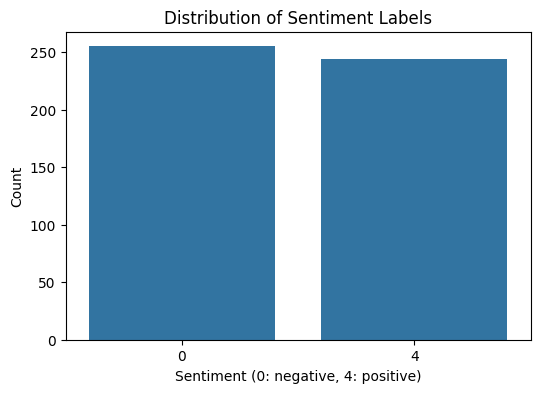

In [133]:
sentiment_counts = df[0].value_counts().sort_index()
print("\nDistribution of Sentiment Labels (0: negative, 4: positive):")
print(sentiment_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index.astype(str), y=sentiment_counts.values)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: negative, 4: positive)')
plt.ylabel('Count')
plt.show()

Distribution of Text lengths.
Craete a new column for text lengths


Descriptive statistics of text lengths:
count    499.000000
mean      58.198397
std       32.943951
min        3.000000
25%       32.000000
50%       52.000000
75%       84.000000
max      136.000000
Name: text_length, dtype: float64


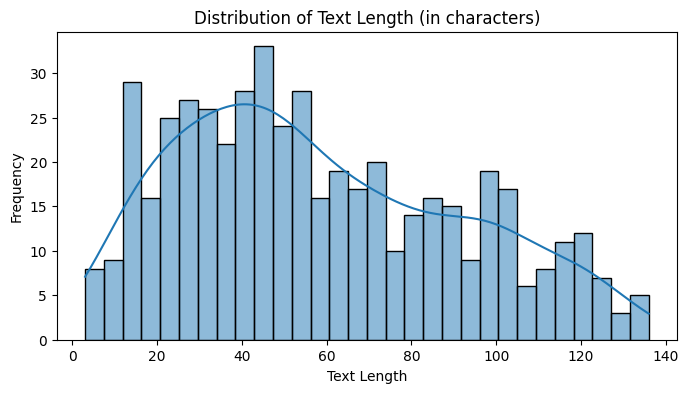

In [134]:
df['text_length'] = df[5].apply(len)
print("\nDescriptive statistics of text lengths:")
print(df['text_length'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length (in characters)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Sum up the TF-IDF weights across all documents for each term

In [135]:
tfidf_sum = np.array(X_tfidf.sum(axis=0)).flatten()
print(tfidf_sum)
print(tfidf_sum.shape)

[17.13619704  0.25546328  0.2593308  ...  0.47990866  0.39183789
  0.45275226]
(1819,)


Get feature names from the vectorizer

In [136]:
vocab = vectorizer.get_feature_names_out()
print(vocab)

['a' 'aaahhhh' 'abandoned' ... 'yummmyy' 'yummy' 'zip']


Create a DataFrame for words and their corresponding total TF-IDF weights.

In [137]:
tfidf_df = pd.DataFrame({'word': vocab, 'total_tfidf': tfidf_sum})

Sort by weight in descending order to obtain the most influential words.


Top 10 words by total TF-IDF weight:
     word  total_tfidf
752     i    31.984619
1567   to    20.629637
1532  the    20.114936
0       a    17.136197
1026   my    14.342797
1811  you    14.250130
797    it    13.642373
569   for    12.423601
792    is    11.717856
57    and    11.182309


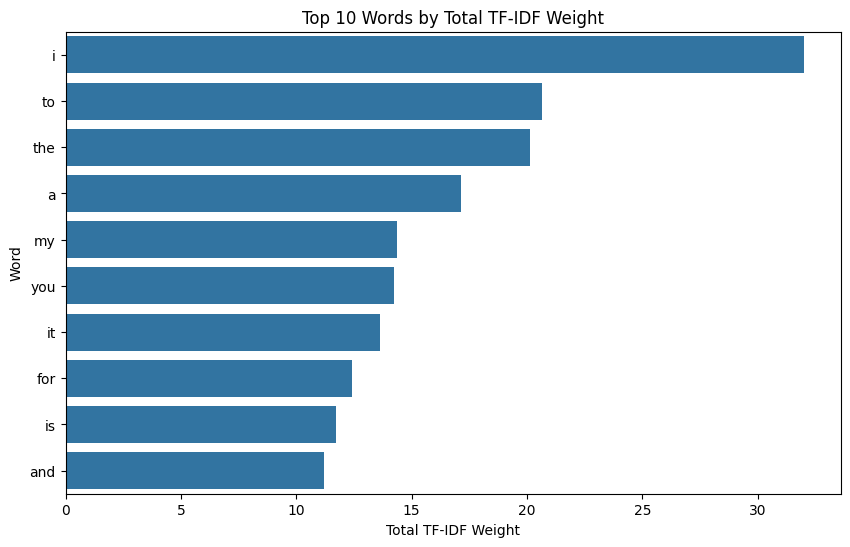

In [138]:
tfidf_df = tfidf_df.sort_values(by='total_tfidf', ascending=False)
print("\nTop 10 words by total TF-IDF weight:")
print(tfidf_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x="total_tfidf", y="word", data=tfidf_df.head(10))
plt.title('Top 10 Words by Total TF-IDF Weight')
plt.xlabel('Total TF-IDF Weight')
plt.ylabel('Word')
plt.show()

Basic NTLK

In [139]:
import nltk
import matplotlib.pyplot as plt

Download necessary NTLK data files

In [140]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Combine all cleaned text into one large string

In [141]:
all_text = " ".join(df[5].tolist())
print(all_text)

gearing up for nyc this weekend profile php id amp ref profile laying out by the pool for the straight day i m determend to get dark welcome to am wake ups i hav a cold it comes with the sneezles happy birthday to me that s months before my iphone is eligible i might as well wait for the following generation ohhhhhh thats why haha okay now i m really going to bed knight all and i will be having nkotb dreams that s so much well i haven t left yet bcoz it s still early but i m not sure what time i ll come back before dark though on a yellow bus thats driving me too school bye out to get icecream with cheska sorry i cudnt b in h town guys wish i cud but i hv class from to it s a beautiful day in the neighborhood lol hope they would not call the police weather com forecast for hilton head next week all rain and thunderstorms with coastal flood warning i think im slowwly gettin addicted to facebook im such a book face lol wtf much off to bed fifth year tomorrow pray i don t get miss smith h

Tokenize the text into words

In [142]:
tokens = word_tokenize(all_text)

Convert tokens to lowercase to ensure consistency

In [143]:
tokens = [token.lower() for token in tokens]

Remove tokens that are not purely alhabetic

In [144]:
tokens = [token for token in tokens if token.isalpha()]

Load English stopwords

In [145]:
stop_words = set(stopwords.words('english'))

Filter out stopwords

In [146]:
filtered_tokens = [token for token in tokens if token not in stop_words]

Create a frequency distribution of the filtered tokens.

In [147]:
freq_dist = nltk.FreqDist(filtered_tokens)

print("Total number of tokens:", len(tokens))
print("Total number of tokens after filtering stopwords and non-alphabetic tokens:", len(filtered_tokens))
print("\nTop 10 Most Common Tokens:")
print(freq_dist.most_common(10))

Total number of tokens: 6064
Total number of tokens after filtering stopwords and non-alphabetic tokens: 3245

Top 10 Most Common Tokens:
[('day', 31), ('today', 31), ('im', 28), ('go', 27), ('get', 26), ('going', 23), ('u', 22), ('lol', 19), ('know', 19), ('love', 19)]


Plot the top 10 most common words

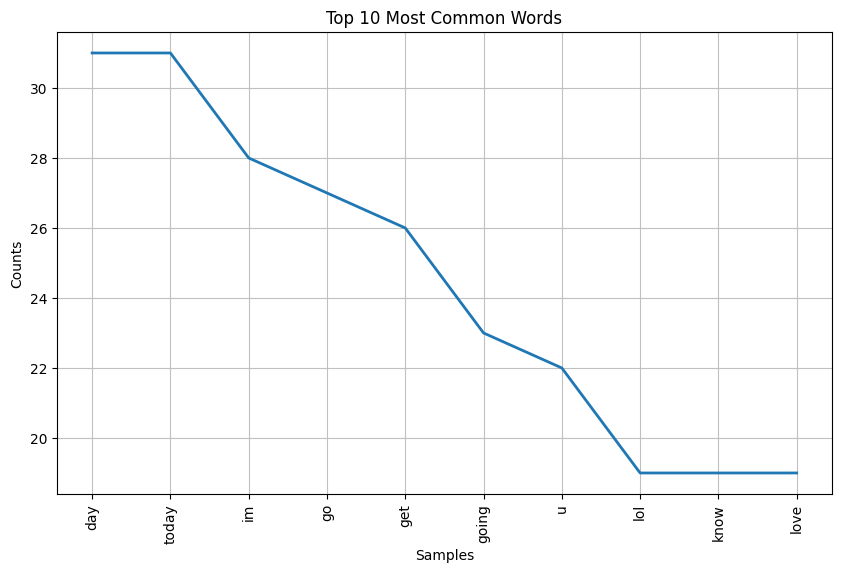

In [148]:
plt.figure(figsize=(10, 6))
freq_dist.plot(10, title='Top 10 Most Common Words')
plt.show()

Perform part of speech tagging on asample text

In [91]:
import nltk
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Download necessary NTLK data files
nltk.download('punkt')
nltk.download('stopwords')
# Download with the language-specific resource identifier
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

# ... (rest of your existing code) ...

sample_text = df[5].iloc[0]
sample_tokens = word_tokenize(sample_text)
sample_tags = nltk.pos_tag(sample_tokens)

print("\nSample text:", sample_text)
print("POS tags:", sample_tags)


Sample text: gearing up for nyc this weekend profile php id amp ref profile
POS tags: [('gearing', 'VBG'), ('up', 'RP'), ('for', 'IN'), ('nyc', 'NN'), ('this', 'DT'), ('weekend', 'NN'), ('profile', 'NN'), ('php', 'NN'), ('id', 'NN'), ('amp', 'NN'), ('ref', 'NN'), ('profile', 'NN')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Vader Sentiment Scoring

In [149]:
from nltk.sentiment import SentimentIntensityAnalyzer

Download VADER lexicon

In [150]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Calculate VADER sentiment Scoring for each text.

In [151]:
sia = SentimentIntensityAnalyzer()

df['vader_scores'] = df[5].apply(lambda text: sia.polarity_scores(text))

Extract the compound score for the summary measure

In [153]:
df['compound'] = df['vader_scores'].apply(lambda scores: scores['compound'])
print(df['compound'])

1030005    0.0000
935110     0.2263
859710     0.4588
268457     0.0000
817772     0.5719
            ...  
175873     0.0196
1125898    0.6369
722940     0.3612
836863     0.4310
809069     0.4215
Name: compound, Length: 499, dtype: float64


classify sentiment based on the compound score.

In [154]:
#    compound >= 0.05  → Positive
#    compound <= -0.05 → Negative
#    else              → Neutral
df['vader_sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0.05
                                               else ('negative' if score <= -0.05 else 'neutral'))

# Display the first few rows with the VADER results.
print(df[['vader_scores', 'compound', 'vader_sentiment']].head())

                                              vader_scores  compound  \
1030005  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
935110   {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...    0.2263   
859710   {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...    0.4588   
268457   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
817772   {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...    0.5719   

        vader_sentiment  
1030005         neutral  
935110         positive  
859710         positive  
268457          neutral  
817772         positive  


Plot VADER Results

<ipython-input-155-d11f06a83a77>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


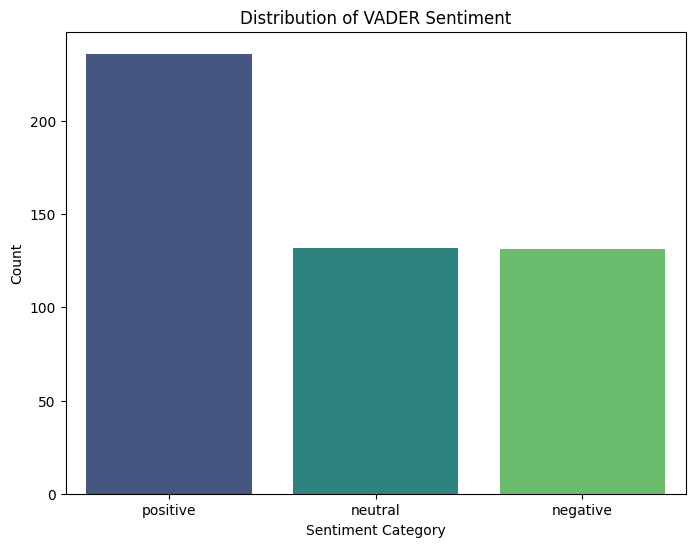

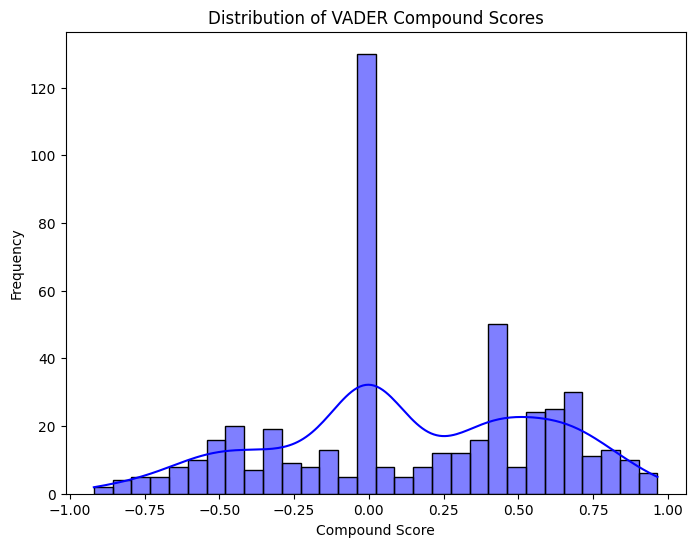

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of VADER sentiment categories
sentiment_counts = df['vader_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of VADER Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# Histogram of VADER compound scores
plt.figure(figsize=(8, 6))
sns.histplot(df['compound'], bins=30, kde=True, color="blue")
plt.title("Distribution of VADER Compound Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()


Roberta Pretrained Model.Here,we use Hugging Face's Transformer library with a RoBERTa model that has been fine‑tuned for Twitter sentiment analysis.

In [156]:
from transformers import pipeline

Initialize the RoBERTa Sentiment Analysis Pipeline

In [158]:
classifier = pipeline(
    'sentiment-analysis',
    model='cardiffnlp/twitter-roberta-base-sentiment',
    tokenizer='cardiffnlp/twitter-roberta-base-sentiment',
    truncation=True  # ensure texts longer than model limits are properly truncated
)

Device set to use cpu


In [159]:
texts = df[5].tolist()
# Apply the classifier on all texts (batch processing helps with speed)
results = classifier(texts, truncation=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [160]:
df['roberta_sentiment'] = [result['label'] for result in results]
df['roberta_score'] = [result['score'] for result in results]

Bar plot  of sentiment distribution

<ipython-input-161-1197c87f6f9c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


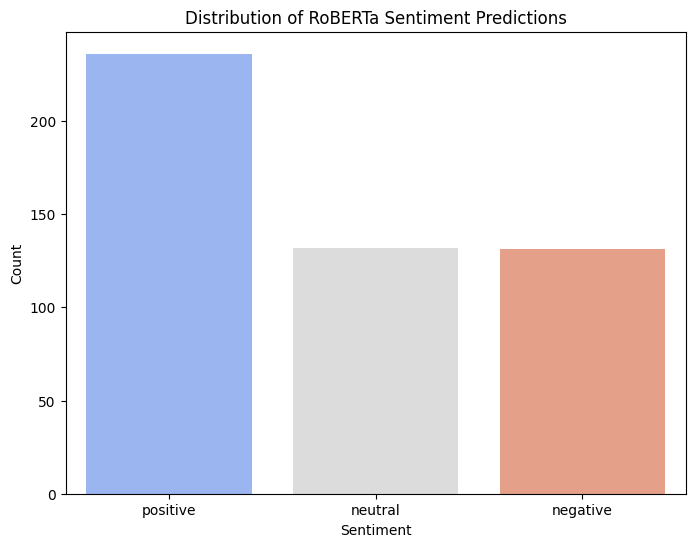

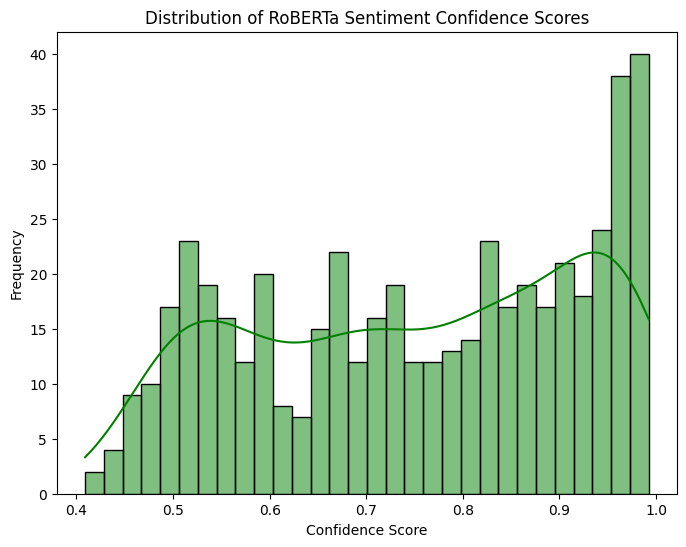

In [161]:
entiment_counts = df['roberta_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title("Distribution of RoBERTa Sentiment Predictions")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Histogram of the confidence scores from RoBERTa
plt.figure(figsize=(8, 6))
sns.histplot(df['roberta_score'], bins=30, kde=True, color='green')
plt.title("Distribution of RoBERTa Sentiment Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

Comapre between two models

In [162]:
df['vader_sentiment'] = df['vader_sentiment'].str.lower()
df['roberta_sentiment'] = df['roberta_sentiment'].str.lower()

Cross Tabulation (HeatMAp) of Sentiment Predictions

Cross Tabulation (counts):
roberta_sentiment  label_0  label_1  label_2
vader_sentiment                             
negative                98       29        4
neutral                 25       83       24
positive                25       80      131

Cross Tabulation (row-normalized):
roberta_sentiment   label_0   label_1   label_2
vader_sentiment                                
negative           0.748092  0.221374  0.030534
neutral            0.189394  0.628788  0.181818
positive           0.105932  0.338983  0.555085


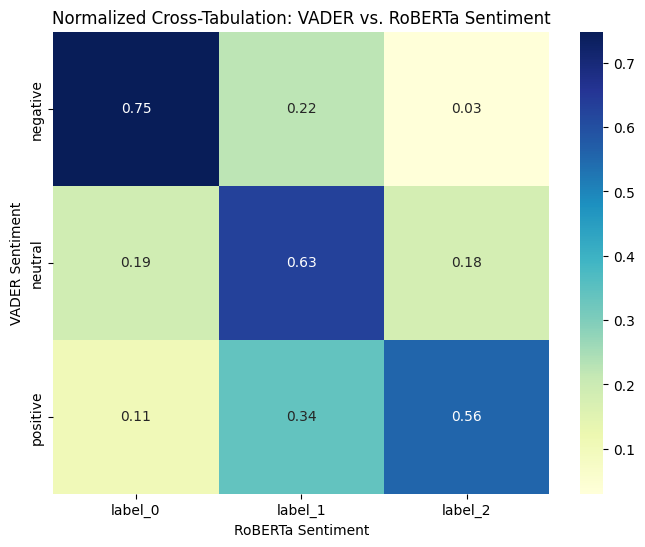

In [163]:
# Create a cross-tabulation counting the occurrence of each combination.
crosstab = pd.crosstab(df['vader_sentiment'], df['roberta_sentiment'])

# Also create a normalized version (percentage row-wise).
crosstab_norm = pd.crosstab(df['vader_sentiment'], df['roberta_sentiment'], normalize='index')

print("Cross Tabulation (counts):")
print(crosstab)

print("\nCross Tabulation (row-normalized):")
print(crosstab_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_norm, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Normalized Cross-Tabulation: VADER vs. RoBERTa Sentiment")
plt.xlabel("RoBERTa Sentiment")
plt.ylabel("VADER Sentiment")
plt.show()

<ipython-input-164-df2e8550b330>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='roberta_sentiment', y='compound', data=df, palette="Set2")


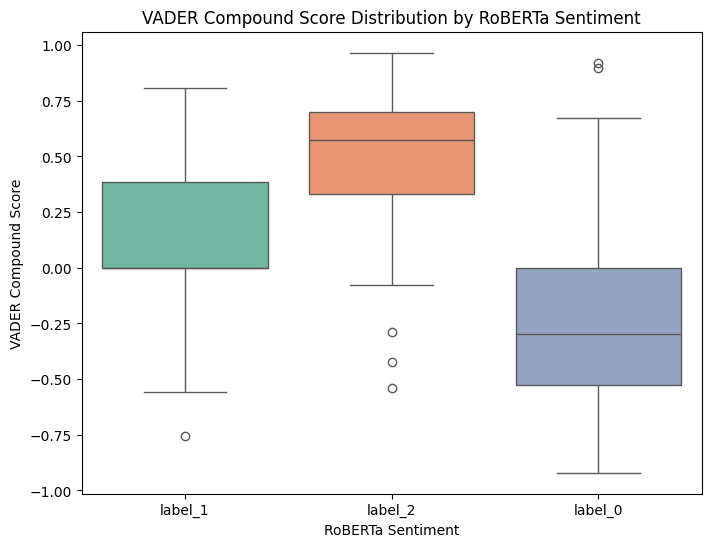

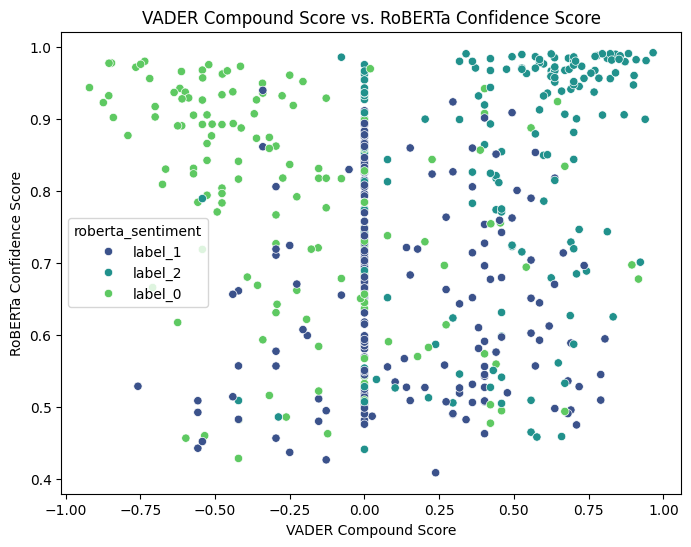

In [164]:
#  Box Plot of VADER Compound Scores Grouped by RoBERTa Sentiment
# -------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='roberta_sentiment', y='compound', data=df, palette="Set2")
plt.title("VADER Compound Score Distribution by RoBERTa Sentiment")
plt.xlabel("RoBERTa Sentiment")
plt.ylabel("VADER Compound Score")
plt.show()

# -------------------------------------------
# (Optional) Plot 3: Scatter Plot of VADER Compound Score vs. RoBERTa Confidence Score
# Note: Since the metrics are different, we can see if—within a given category—high confidence aligns with extreme compound scores.
# Here, we first map RoBERTa sentiment to a numeric scale for visualization (e.g., Negative: -1, Neutral: 0, Positive: 1).
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['roberta_numeric'] = df['roberta_sentiment'].map(sentiment_mapping)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='compound', y='roberta_score', hue='roberta_sentiment', data=df, palette="viridis")
plt.title("VADER Compound Score vs. RoBERTa Confidence Score")
plt.xlabel("VADER Compound Score")
plt.ylabel("RoBERTa Confidence Score")
plt.show()

In [165]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
if 'roberta_numeric' not in df.columns:
    df['roberta_numeric'] = df['roberta_sentiment'].map(sentiment_mapping)

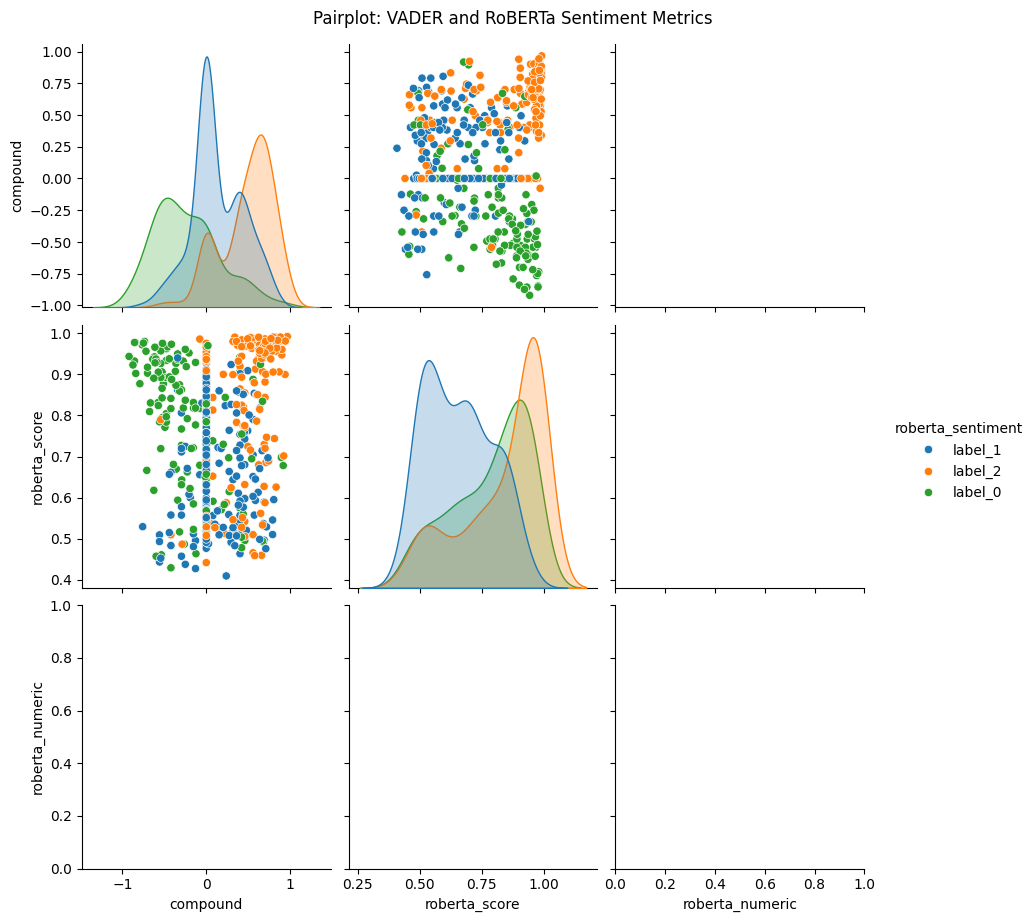

In [166]:
plot_cols = ["compound", "roberta_score", "roberta_numeric"]

# Create the pairplot. We add hue using 'roberta_sentiment' for a richer visualization.
sns.pairplot(
    df[plot_cols + ["roberta_sentiment"]],
    hue="roberta_sentiment",
    diag_kind="kde",
    height=3
)
plt.suptitle("Pairplot: VADER and RoBERTa Sentiment Metrics", y=1.02)
plt.show()

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Train the Sentiment Classification Model

In [168]:
print("Unique classes in y_train:", np.unique(y_train))
print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts())


Unique classes in y_train: [0 4]
Class distribution in y_train:
0    204
4    195
Name: count, dtype: int64


In [169]:
print("Class distribution in full dataset:")
print(pd.Series(y).value_counts())


Class distribution in full dataset:
0    255
4    244
Name: count, dtype: int64


In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y  # Preserve class proportions
)


In [171]:
print(X_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.11496272 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.12225303 0.         0.         ... 0.         0.         0.        ]
 [0.20368692 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [172]:
print(X_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.08480819 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [173]:
print(y_train)

[4 4 0 4 0 0 4 4 4 0 0 0 0 0 4 0 4 4 0 0 0 4 4 0 4 4 4 4 4 0 4 0 4 0 4 0 0
 4 4 0 0 4 4 4 0 0 0 0 4 4 0 4 4 0 4 0 4 0 0 4 4 0 0 4 0 4 4 0 0 4 4 4 0 4
 4 4 0 0 4 0 4 4 0 0 0 4 4 4 0 4 0 4 0 0 4 0 4 4 0 0 4 4 0 4 0 0 0 0 4 4 0
 0 4 0 4 0 4 4 4 0 4 0 0 4 4 0 4 4 0 0 0 0 0 4 4 0 0 0 4 4 4 0 0 4 0 0 4 0
 0 0 4 0 0 0 4 4 4 4 0 0 0 4 4 4 0 0 4 0 4 4 4 0 0 0 4 4 4 0 4 0 4 0 4 0 0
 0 4 4 4 4 0 4 4 0 0 0 0 0 0 4 4 0 0 4 0 4 4 0 0 0 4 4 4 0 4 4 4 4 0 0 0 4
 0 0 4 4 0 0 0 0 0 0 0 4 0 4 4 4 0 0 0 0 4 4 0 4 0 0 4 4 0 4 0 4 0 4 0 4 4
 4 0 4 0 4 4 0 0 4 0 0 4 0 4 4 0 4 4 4 0 0 0 4 0 4 0 4 0 4 0 0 4 4 0 0 0 0
 4 4 0 4 0 0 0 0 4 0 4 4 0 4 0 4 0 0 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 4 4 0 0
 4 0 4 0 4 0 4 0 0 4 0 0 0 0 0 4 0 0 0 4 0 0 0 4 0 0 4 0 4 4 0 4 0 4 4 4 4
 4 0 0 0 0 0 0 0 4 4 4 0 0 0 4 4 4 4 4 0 0 4 0 4 4 4 0 4 0]


In [174]:
print(y_test)

[0 4 0 4 4 0 0 0 4 0 0 0 0 0 4 0 4 0 4 4 0 4 4 4 4 4 4 0 0 4 4 4 4 0 4 4 0
 4 4 0 0 0 0 4 4 0 4 0 0 0 0 4 4 4 0 0 4 0 0 0 4 0 0 4 0 0 4 0 4 4 4 4 0 0
 0 4 4 0 0 4 4 0 0 4 0 0 4 4 4 4 4 4 4 0 4 0 0 0 0 0]


In [175]:
print("Class distribution in the randomly sampled 500 rows:")
print(pd.Series(df[0]).value_counts())


Class distribution in the randomly sampled 500 rows:
0
0    255
4    244
Name: count, dtype: int64


In [176]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, random_state=1)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=1)

Make Predictions on Test data

In [177]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 4 0 4 0 4 0 0 0 4 4 0 0 0 4 4 0 0 4 0 4 0 4 4 0 0 0 0 4 4 4 0 0 0 0 4 0
 4 4 0 4 4 0 4 4 4 0 0 0 0 0 4 4 0 0 0 4 0 0 4 4 4 4 4 0 4 0 0 4 4 4 0 0 4
 0 0 4 4 0 4 0 0 0 4 4 0 4 0 4 0 4 4 4 0 0 0 4 0 0 0]


In [178]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.6300


In [179]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.67      0.65        51
    Positive       0.63      0.59      0.61        49

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



In [180]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[34 17]
 [20 29]]


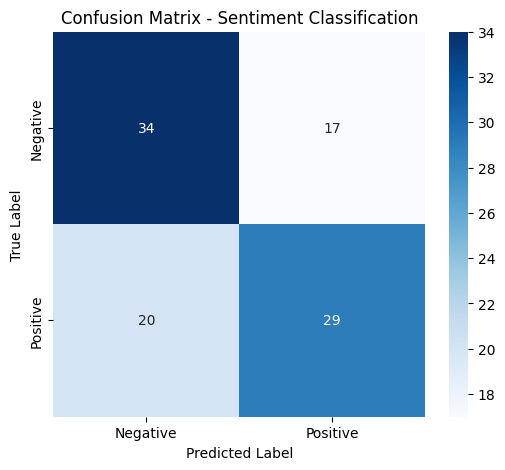

In [181]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Sentiment Classification")
plt.show()

In [183]:


# Text Cleaning Enhancements
import nltk
import re   # Import the 're' module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')  # Download stopwords if you haven't
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text_words = text.split(' ')
    text_words = [lemmatizer.lemmatize(word) for word in text_words]
    text_words = [word for word in text_words if word not in stop_words]
    return " ".join(text_words)

df[5] = df[5].apply(clean_text)
df = df[df[5] != ""]

# TF-IDF with N-grams and Stop Words
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words='english', ngram_range=(1, 2))  # Added stop_words and ngram_range
X_tfidf = vectorizer.fit_transform(df[5])
X = X_tfidf.toarray()
y = df[0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Model Training and Evaluation (Example: Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.62      0.73      0.67        51
           4       0.65      0.53      0.58        49

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100

[[37 14]
 [23 26]]


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        51
           4       0.65      0.53      0.58        49

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100

Confusion Matrix:
 [[37 14]
 [23 26]]
Accuracy: 0.63


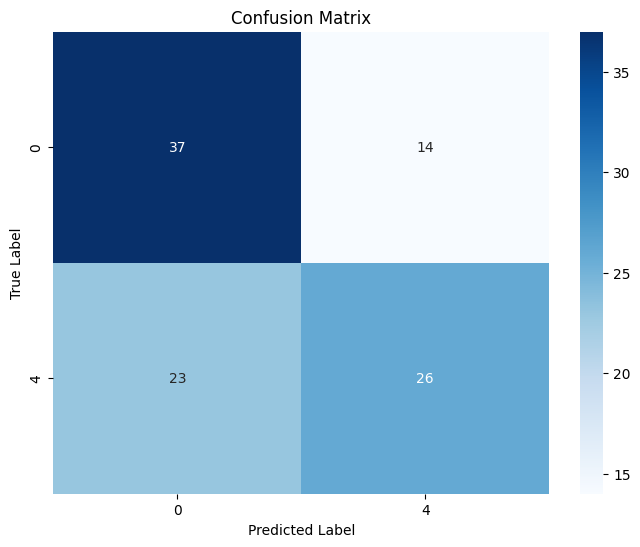


Error Analysis:
True: 4, Predicted: 0, Text: laying pool straight day determend get dark
True: 0, Predicted: 4, Text: welcome wake ups
True: 4, Predicted: 0, Text: hav cold come sneezles
True: 4, Predicted: 0, Text: happy birthday
True: 4, Predicted: 0, Text: much well left yet bcoz still early sure time come back dark though
True: 0, Predicted: 4, Text: get icecream cheska
True: 0, Predicted: 4, Text: beautiful day neighborhood
True: 4, Predicted: 0, Text: weather com forecast hilton head next week rain thunderstorm coastal flood warning
True: 0, Predicted: 4, Text: started great mother day season
True: 4, Predicted: 0, Text: tested trying strong

Feature importance not available for this model (Naive Bayes).


<ipython-input-185-535908e0088f>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[0], palette='viridis')


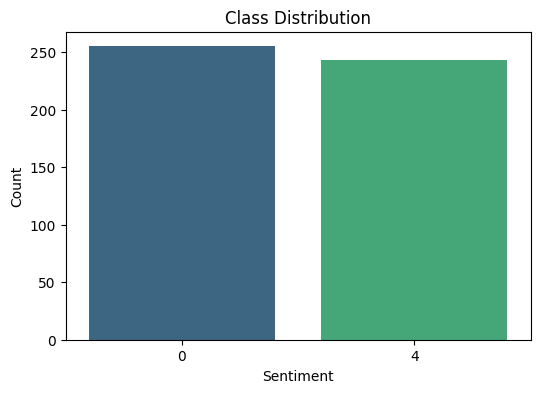

In [185]:
# Model Training and Evaluation (Example: Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 4], yticklabels=[0, 4])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Error Analysis
print("\nError Analysis:")
error_indices = np.where(y_test != y_pred)[0]
# Get the indices of the X_test data points
X_test_indices = np.arange(len(X_test))  # Assuming X_test is a NumPy array or similar
for i in error_indices[:10]:  # Show only the first 10 errors for brevity
    print(f"True: {y_test[i]}, Predicted: {y_pred[i]}, Text: {df.iloc[X_test_indices[i], 5]}") # Assuming column 5 contains the text

# Feature Importance (for models where it's available -  e.g., Logistic Regression, not directly for Naive Bayes)
try:
    feature_importance = model.coef_[0]  # For Naive Bayes, this doesn't directly give importance
    top_features = sorted(zip(vectorizer.get_feature_names_out(), feature_importance), key=abs, reverse=True)[:20]

    print("\nTop 20 Features:")
    for feature, importance in top_features:
        print(f"{feature}: {importance:.4f}")

    plt.figure(figsize=(10, 6))
    plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Top 20 Features by Importance")
    plt.show()


except AttributeError:
    print("\nFeature importance not available for this model (Naive Bayes).")


# --- Additional Visualization (Example: Class Distribution) ---
plt.figure(figsize=(6, 4))
sns.countplot(x=df[0], palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()